# SPACEc: Cellular Neighborhood Analysis

### Set up environment

In [1]:
# silencing warnings
import warnings
warnings.filterwarnings('ignore')

#import standard packages
import pathlib
import scanpy as sc

In [2]:
import spacec as sp

2024-01-18 08:45:14.900023: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mgbckr/miniconda3/envs/yuqi-spacodex/lib/python3.10/site-packages/cv2/../../lib64:
2024-01-18 08:45:14.900045: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
root_path = pathlib.Path("..")

data_path = root_path / 'data' # where the data is stored

# where you want to store the output
output_dir = root_path / '_out'
output_dir.mkdir(exist_ok=True, parents=True)

In [4]:
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [6]:
adata = sc.read(output_dir / 'adata_nn_demo_annotated_cn.h5ad')
adata

AnnData object with n_obs × n_vars = 49548 × 58
    obs: 'DAPI', 'x', 'y', 'area', 'region_num', 'region', 'unique_region', 'condition', 'leiden_0.4', 'leiden_0.4_subcluster_0', 'leiden_0.4_subcluster_3', 'leiden_0.4_subcluster_4', 'celltype', 'leiden_0.4_subcluster_2', 'leiden_0.4_subcluster_11', 'leiden_0.4_subcluster_0sub', 'celltype_fine', 'CN_k20_n6', 'CN_k20_n6_annot'
    uns: 'Centroid_k20_n6', 'celltype_fine_colors', 'dendrogram_leiden_0.4', 'dendrogram_leiden_0.4_subcluster_4', 'leiden', 'leiden_0.4_colors', 'leiden_0.4_subcluster_0sub_colors', 'leiden_0.4_subcluster_4_colors', 'neighbors', 'umap', 'unique_region_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

Estimated number of clusters: 4
Estimated number of noise points: 16


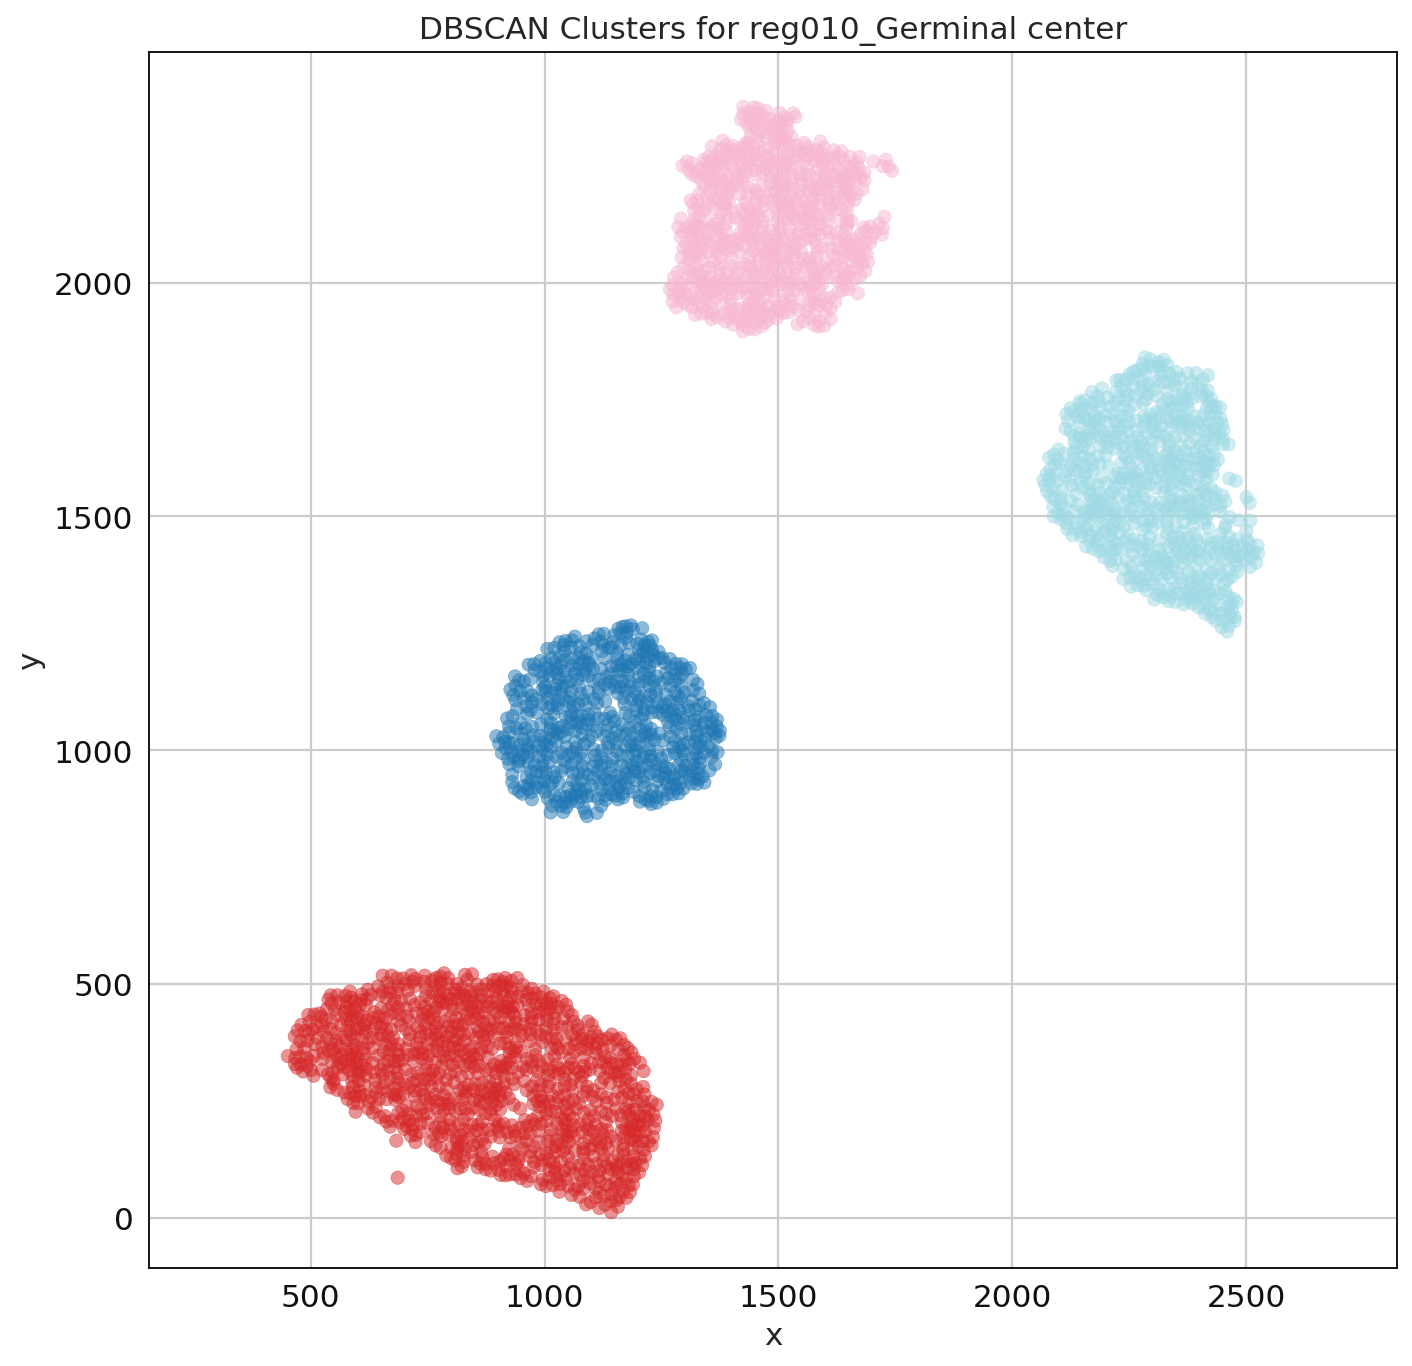

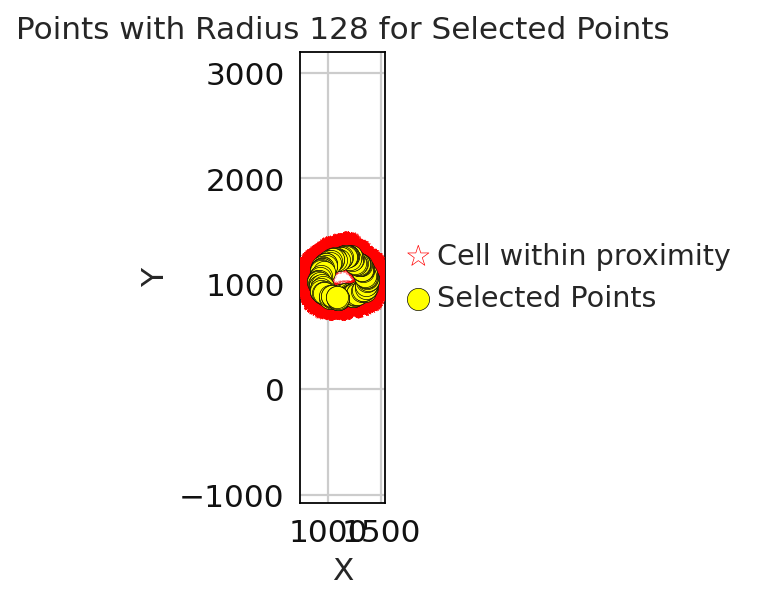

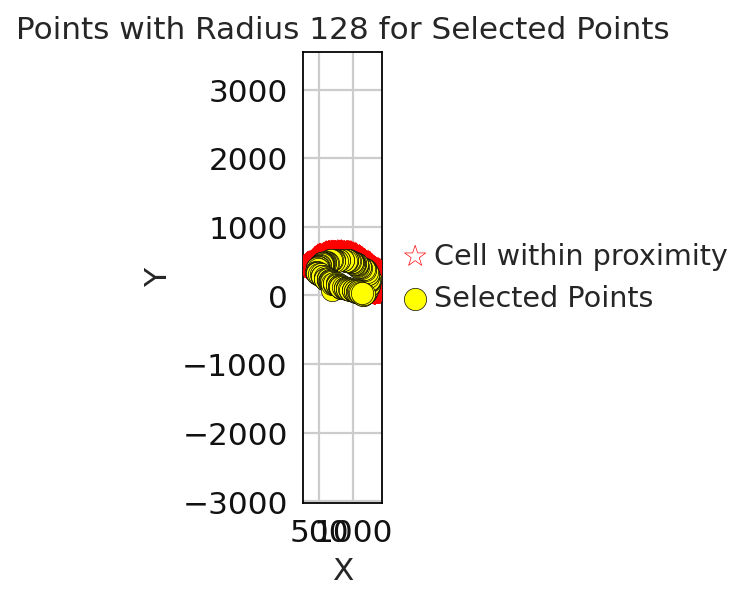

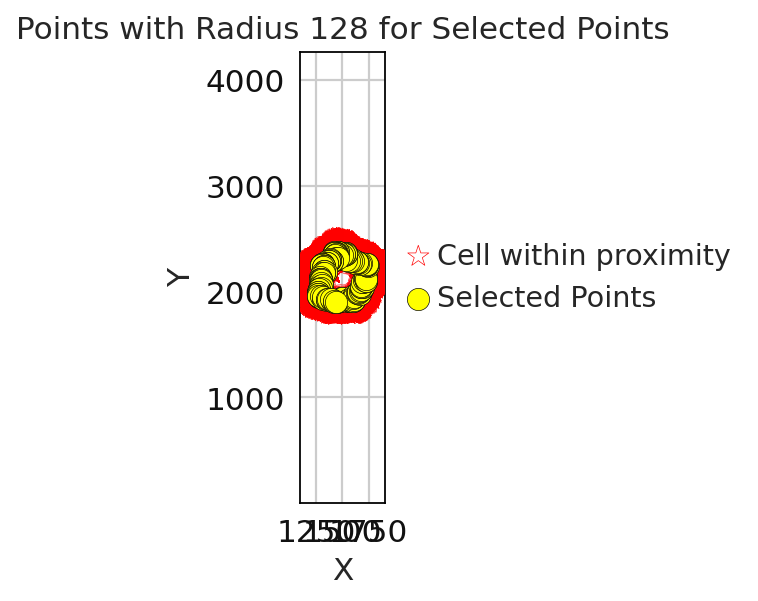

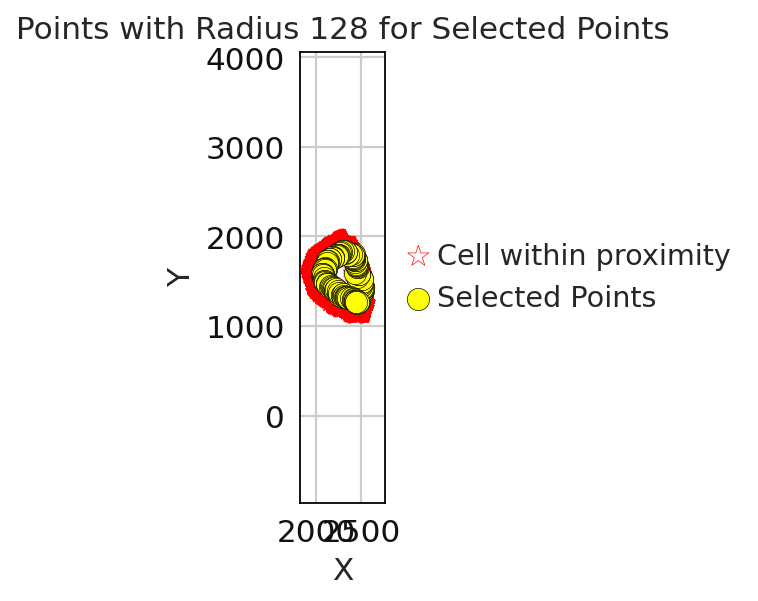

Finished reg010_Germinal center
Estimated number of clusters: 2
Estimated number of noise points: 261


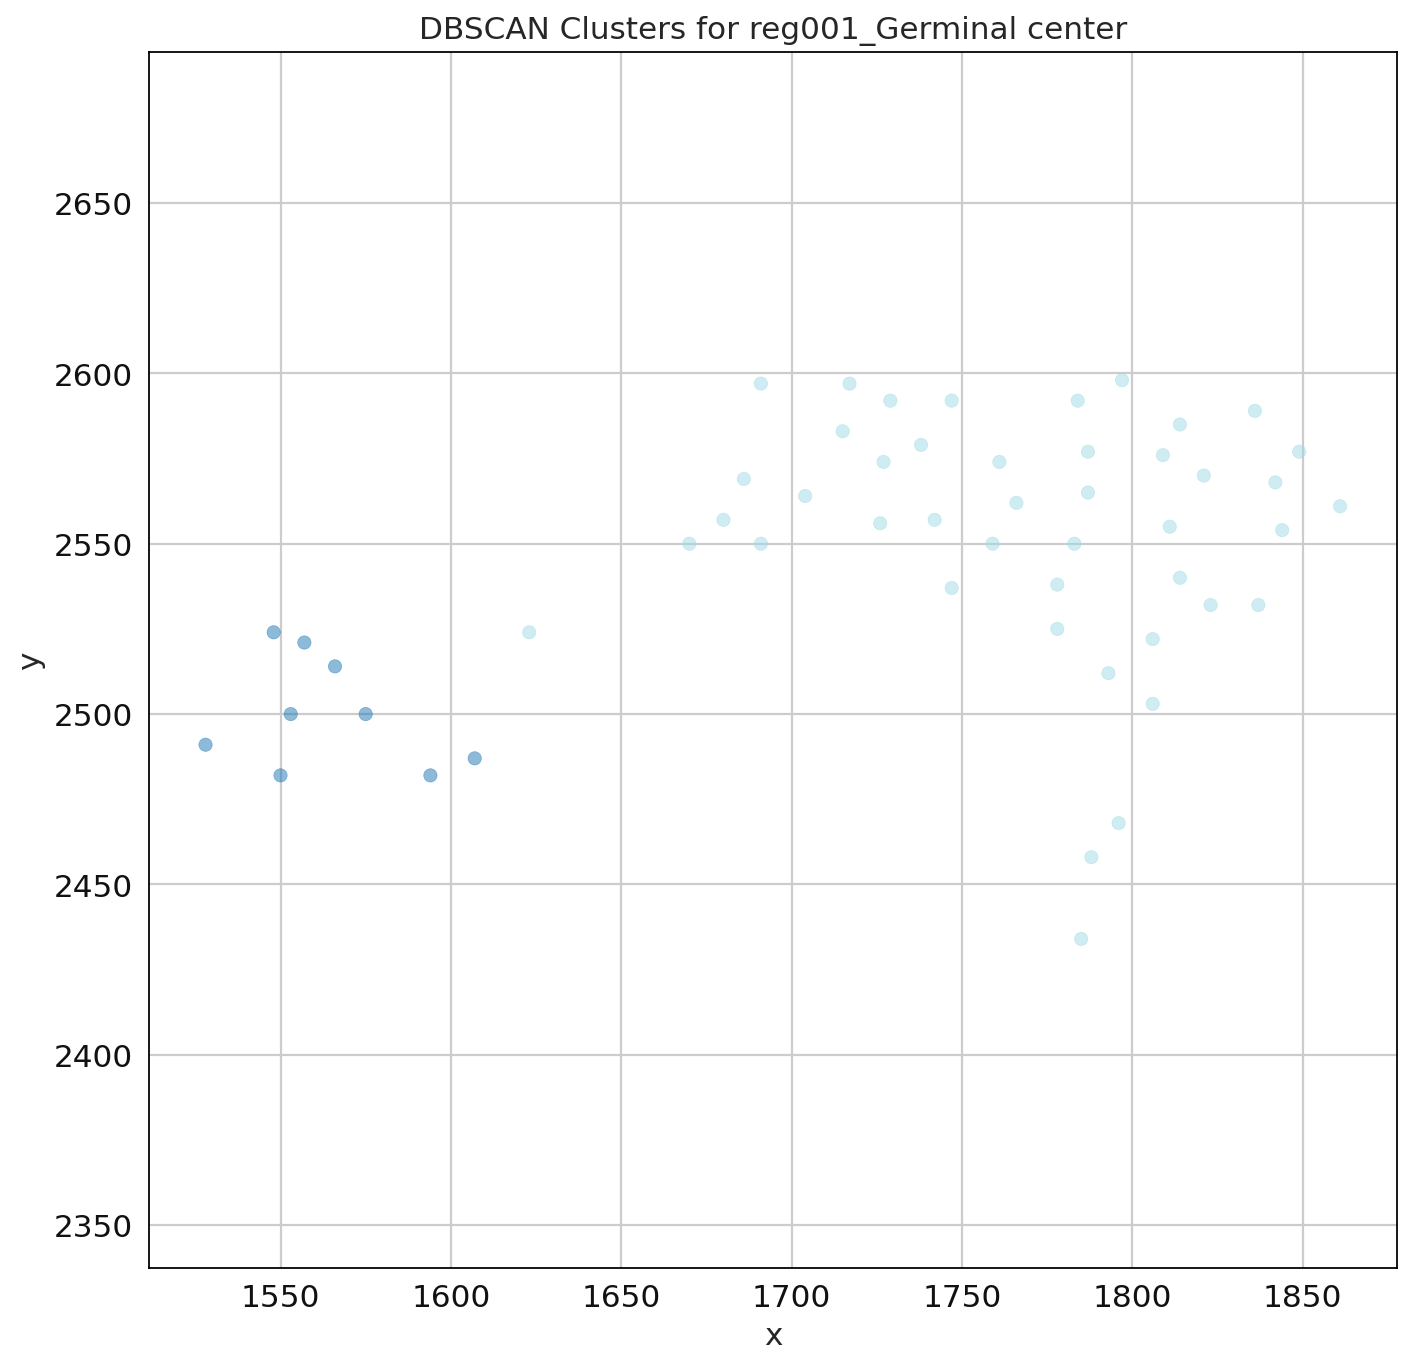

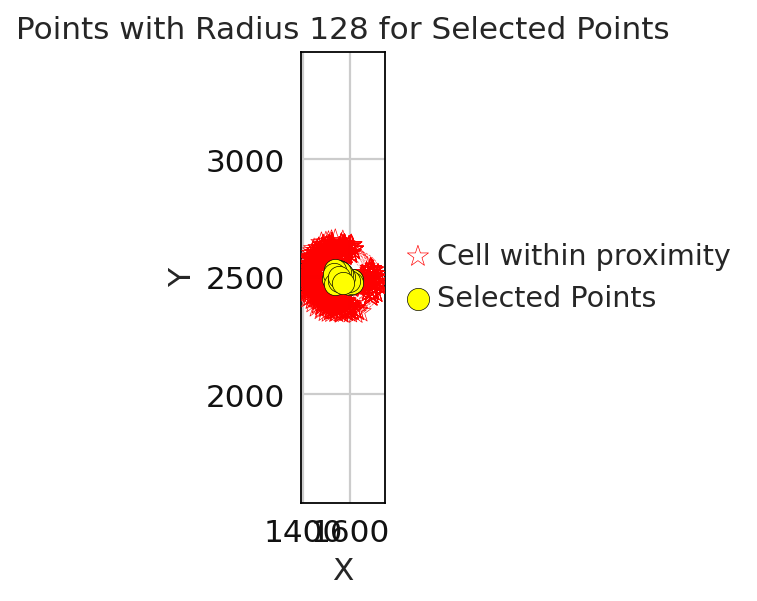

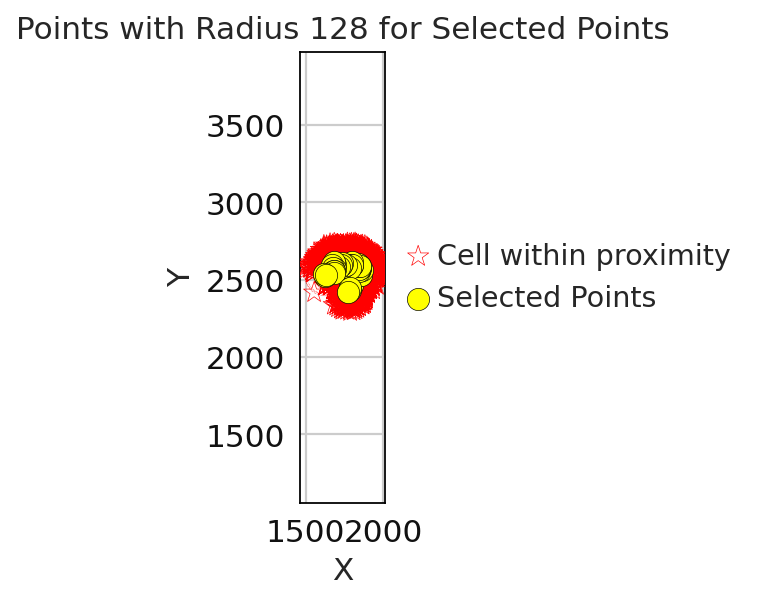

Finished reg001_Germinal center


In [7]:
# this region result is also saved to adata.uns
region_results = sp.tl.tl_patch_proximity_analysis(
    adata, 
    region_column = "unique_region", 
    patch_column = "CN_k20_n6_annot", 
    group="Germinal center",
    min_samples=50, 
    x_column='x', y_column='y', 
    radius = 128,
    edge_neighbours = 3,
    key_name = 'ppa_result',
    plot = True)

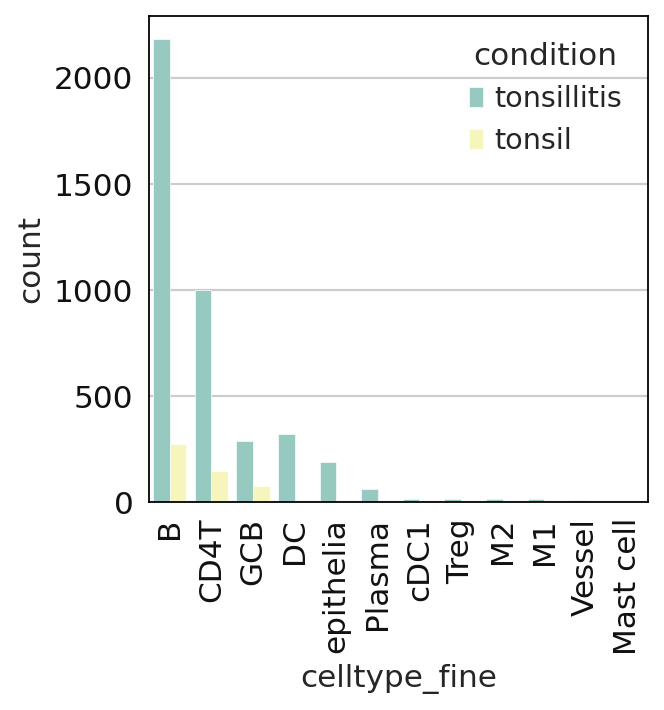

In [8]:
# plot the result to see the cell types enriched around the edge of the patches
sp.pl.count_patch_proximity_res(
    adata, 
    x="celltype_fine", 
    hue="condition", 
    palette="Set3",
    order = True,
    key_name = 'ppa_result',
    savefig = False)